In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 50
pd.options.mode.chained_assignment = None

In [2]:
%%capture
!jupyter nbconvert --to html --no-input --no-prompt Notebook.ipynb

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Combine string 
# k = input("Please enter the clinical concept code: ")
k = "A1"
# print(k)

flag = "_FLAG"
preTBI = "_DATE_MIN_PRE"
postTBI = "_DATE_MIN_POST"
dod = "_DATE_MIN_DOD"
va = "_DATE_MIN_VA"

kflag = k + flag
kpre = k + preTBI
kpost = k + postTBI
kdod = k + dod
kva = k + va

print(kflag)
print(kpre)
print(kpost)
print(kdod)
print(kva)

A1_FLAG
A1_DATE_MIN_PRE
A1_DATE_MIN_POST
A1_DATE_MIN_DOD
A1_DATE_MIN_VA


In [4]:
d = {'A1_FLAG': [1, 0, 1, 0, 1], 'A1_DATE_MIN_PRE': [2, None, 2, 10, 3], 
     'A2_FLAG': [0,0,0,1,1], 'A2_DATE_MIN_PRE': [2, None, 1, 2, None]}
df = pd.DataFrame(data=d)
display(df)

,A1_FLAG,A1_DATE_MIN_PRE,A2_FLAG,A2_DATE_MIN_PRE
0,1,2.0,0,2.0
1,0,NaN,0,NaN
2,1,2.0,0,1.0
3,0,10.0,1,2.0
4,1,3.0,1,NaN


In [5]:
#### Elliot's Code
df1 = pd.DataFrame(d)

# Function to transform df1 into df2
def transform_dataframe(df1):
    column_names = []
    n_values = []
    percentage_values = []

    for column in df1.columns:
        column_names.append(column)
        valid_cells = df1[column][(df1[column] != 0) & (~df1[column].isnull())].count()
        n_values.append(valid_cells)
        percentage_values.append(valid_cells / len(df1[column]) * 100)

    data = {
        "Column": column_names,
        "n": n_values,
        "%": percentage_values
    }

    df2 = pd.DataFrame(data)
    
    return df2

# Transform df1 into df2
df2 = transform_dataframe(df1)

# Print df1 and df2
# print("DataFrame 1:")
# print(df1)

print("\nDataFrame 2:")
display(df2.style.hide_index())

####


DataFrame 2:


C:\Users\tsuim\AppData\Local\Temp\ipykernel_21708\1290042130.py:34: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(df2.style.hide_index())


Column,n,%
A1_FLAG,3,60.000000
A1_DATE_MIN_PRE,4,80.000000
A2_FLAG,2,40.000000
A2_DATE_MIN_PRE,3,60.000000


AttributeError: 'AxesSubplot' object has no attribute 'pct'

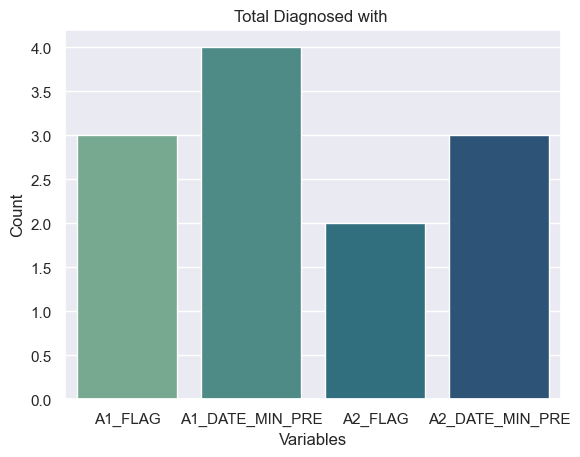

In [6]:
sns.set(style="darkgrid", color_codes=True)
plot = sns.barplot(x="Column", y='n', palette="crest", data=df2, label='small')
plot.set(xlabel ="Variables", ylabel = "Count", title="Total Diagnosed with ")
pct = plot.pct
percentage = df2["%"]
for i in range(len(pct)):
   x = pct[i].get_x() + pct[i].get_width()/2
   y = pct[i].get_height()+.05
   plot.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')
plt.show()


In [ ]:
df.replace(0, np.nan, inplace=True)

In [ ]:
# new_df = df.count().reset_index()
# display(new_df)
# new_df.rename(columns = {'index': 'variable', 0:'count'}, inplace = True)

In [ ]:
df.count()